In [1]:
#IMPORTING REQUIRED LIBRARIES
from keras.models import Sequential, load_model
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from matplotlib import pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [2]:
#PRE-PROCESSING DATA
# train_datagen = ImageDataGenerator(rescale=1. / 255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
print("\nTraining the data...\n")
training_set = test_datagen.flow_from_directory('dataset/train',
                                                 target_size=(224,224),
                                                 batch_size=12,
                                                 class_mode='categorical'
                                                 )

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size=(224,224),
                                            batch_size=12,
                                            class_mode='categorical'
                                            )
print("\n Testing the data.....\n")


Training the data...

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

 Testing the data.....



In [3]:
# CNN MODEL BUILDING
classifier = Sequential()

classifier.add(Convolution2D(512, (3, 3), input_shape=(224, 224,3), activation='relu',strides=(3,3)))

classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Convolution2D(256, (2, 2), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(1, 1)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))

classifier.add(Dense(units=2, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=classifier.fit(training_set,epochs = 30,validation_data = test_set,verbose = 1)

classifier.save(r"models/CNN_1.h5")

Epoch 1/30
334/334 [==============================] - 169s 506ms/step - loss: 0.5910 - accuracy: 0.6902 - val_loss: 0.4339 - val_accuracy: 0.8080
Epoch 2/30
334/334 [==============================] - 199s 595ms/step - loss: 0.4876 - accuracy: 0.7690 - val_loss: 0.4537 - val_accuracy: 0.8120
Epoch 3/30
334/334 [==============================] - 194s 581ms/step - loss: 0.4246 - accuracy: 0.8188 - val_loss: 0.3554 - val_accuracy: 0.8620
Epoch 4/30
334/334 [==============================] - 202s 606ms/step - loss: 0.2772 - accuracy: 0.8875 - val_loss: 0.3732 - val_accuracy: 0.8510
Epoch 5/30
334/334 [==============================] - 202s 606ms/step - loss: 0.1624 - accuracy: 0.9380 - val_loss: 0.2905 - val_accuracy: 0.9210
Epoch 6/30
334/334 [==============================] - 193s 576ms/step - loss: 0.0680 - accuracy: 0.9760 - val_loss: 0.3870 - val_accuracy: 0.8950
Epoch 7/30
334/334 [==============================] - 190s 569ms/step - loss: 0.0374 - accuracy: 0.9877 - val_loss: 0.4021 -

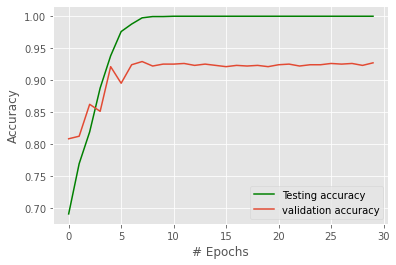

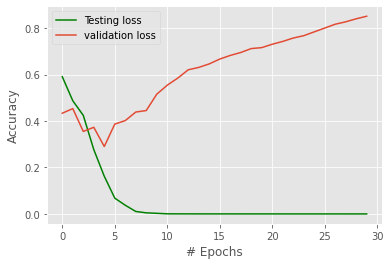

1.0


In [5]:
#PLOTTING GRAPHS FOR ACCURACY AND LOSSES 
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/cnn_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Testing loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/cnn_loss.png")
plt.show()


acc=history.history['accuracy'][-1]
print(acc)